In [1]:
import numpy as np
import pandas as pd

import scipy.io
from scipy.io import loadmat
import matplotlib.pyplot as plt
from matplotlib import cm
import cmocean

from matplotlib import colors

import xarray as xr

from nbformat import read

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [33]:
def MLDS(csig,lonmax,lonmin,latmax,latmin,floats,stations):
    Floats = np.loadtxt(floats) #here, I have created a new variable that loads the float txt file when used

    Lonny = Floats[:,2] #here, I have created a new variable that is made up of all the rows (:) in the third column (2)
    # of the float text file. The [:,2] means the indices that correspond will all the rows of the third column.
    Latty = Floats[:,1] #here, I have created a new variable that is made up of all the rows (:) in the second column (1)
    # of the float text file. The [:,2] means the indices that correspond will all the rows of the third column.
    
    f = xr.open_mfdataset('Argo_mixedlayers_monthlyclim_12112019.nc')
    
    lat = f['lat'].values
    lon = f['lon'].values
    mld = f['mld_da_mean'][:,:,8].values
    
    [xx,yy]=np.meshgrid(lon,lat)

    #So this is where the boundaries that you set up above come into play. You want to zoom into the area the cruise
    # is taking place but you don't want to just set the boundaries of the plot because it will still be processing 
    # the entire dataset. So instead, you'll limit the dataset itself to the area you want

    MLD = mld[(xx>=LonMin)&(xx<=LonMax)&(yy>=LatMin)&(yy<=LatMax)]
    Lon = lon[(lon>=LonMin)&(lon<=LonMax)]
    Lat = lat[(lat>=LatMin)&(lat<=LatMax)]
    
    MLD1 = MLD.reshape(len(Lat),len(Lon))
    
    plt.figure(1,(30,20))
    ax = plt.axes(projection=ccrs.PlateCarree())
    im = ax.pcolor(Lon,Lat,MLD1)
    
    ax.plot(Lonny,Latty,'k-')

    ax.plot(Lonny,Latty,'r.',markersize=50,markeredgecolor='green');

    ax.coastlines()

    g = ax.gridlines(draw_labels=True,linestyle='--') #add gridlines to the map
    
    cbar = plt.colorbar(im,fraction=0.03)
    cbar.ax.tick_params(labelsize=24) 

    g.ylabels_right = False
    g.xlabels_top = False
    from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
    g.xformatter = LONGITUDE_FORMATTER
    g.yformatter = LATITUDE_FORMATTER
    g.xlabel_style = {'size': 24}
    g.ylabel_style = {'size': 24}
    
    plt.title('September Mixed Layer Depth (Argo Climatology, Holte et al) for '+csig,fontsize=30)
    plt.savefig(csig+'/'+csig+'_MLD.png')
    #Image.open(csig+'/'+csig+'_MLD.png').save(csig+'/'+csig+'_MLD.jpg','JPEG');

In [4]:
# make this a seperate .txt file

LonMin = -30; LonMax = 30; LatMin = -60; LatMax = -20; #Put in each number as an integer. Don't get all decimal-y

csig = 'A13'; #the cruise signifier (csig) should be a string (meaning in quotes) with just the name of the cruise. 
#Nothing else. Like 'A20'

#MAKE THIS .TXT
floats = 'Year_6/A135/2019_A13.5_Proposed_Floats'; #this is a path to the float file. 
# should be a string  (meaning in quotes like 'Documents/SOCCOM/Cruises/A20_Float_Locations.txt')
#float_path
# the slashes signify that it's another folder. So within the Documents folder is a SOCCOM folder and within that is 
# a Cruises folder and within that is the 2019_A13.5_Float_Locations file
# If there is no float file to be used, just put 'False'

#MAKE THIS .TXT
# stations = 'Year_6/A135/2019_A13.5_station_locations.txt'
stations = 'False'; # should be a string  (meaning in quotes like 'Documents/SOCCOM/Cruises/2019_A13.5_Station_Locations.txt')
# the slashes signify that it's another folder. So within the Documents folder is a SOCCOM folder and within that is 
# a Cruises folder and within that is the A20_Station_Locations.txt file
# If there is no station file to be used, just put 'False'


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


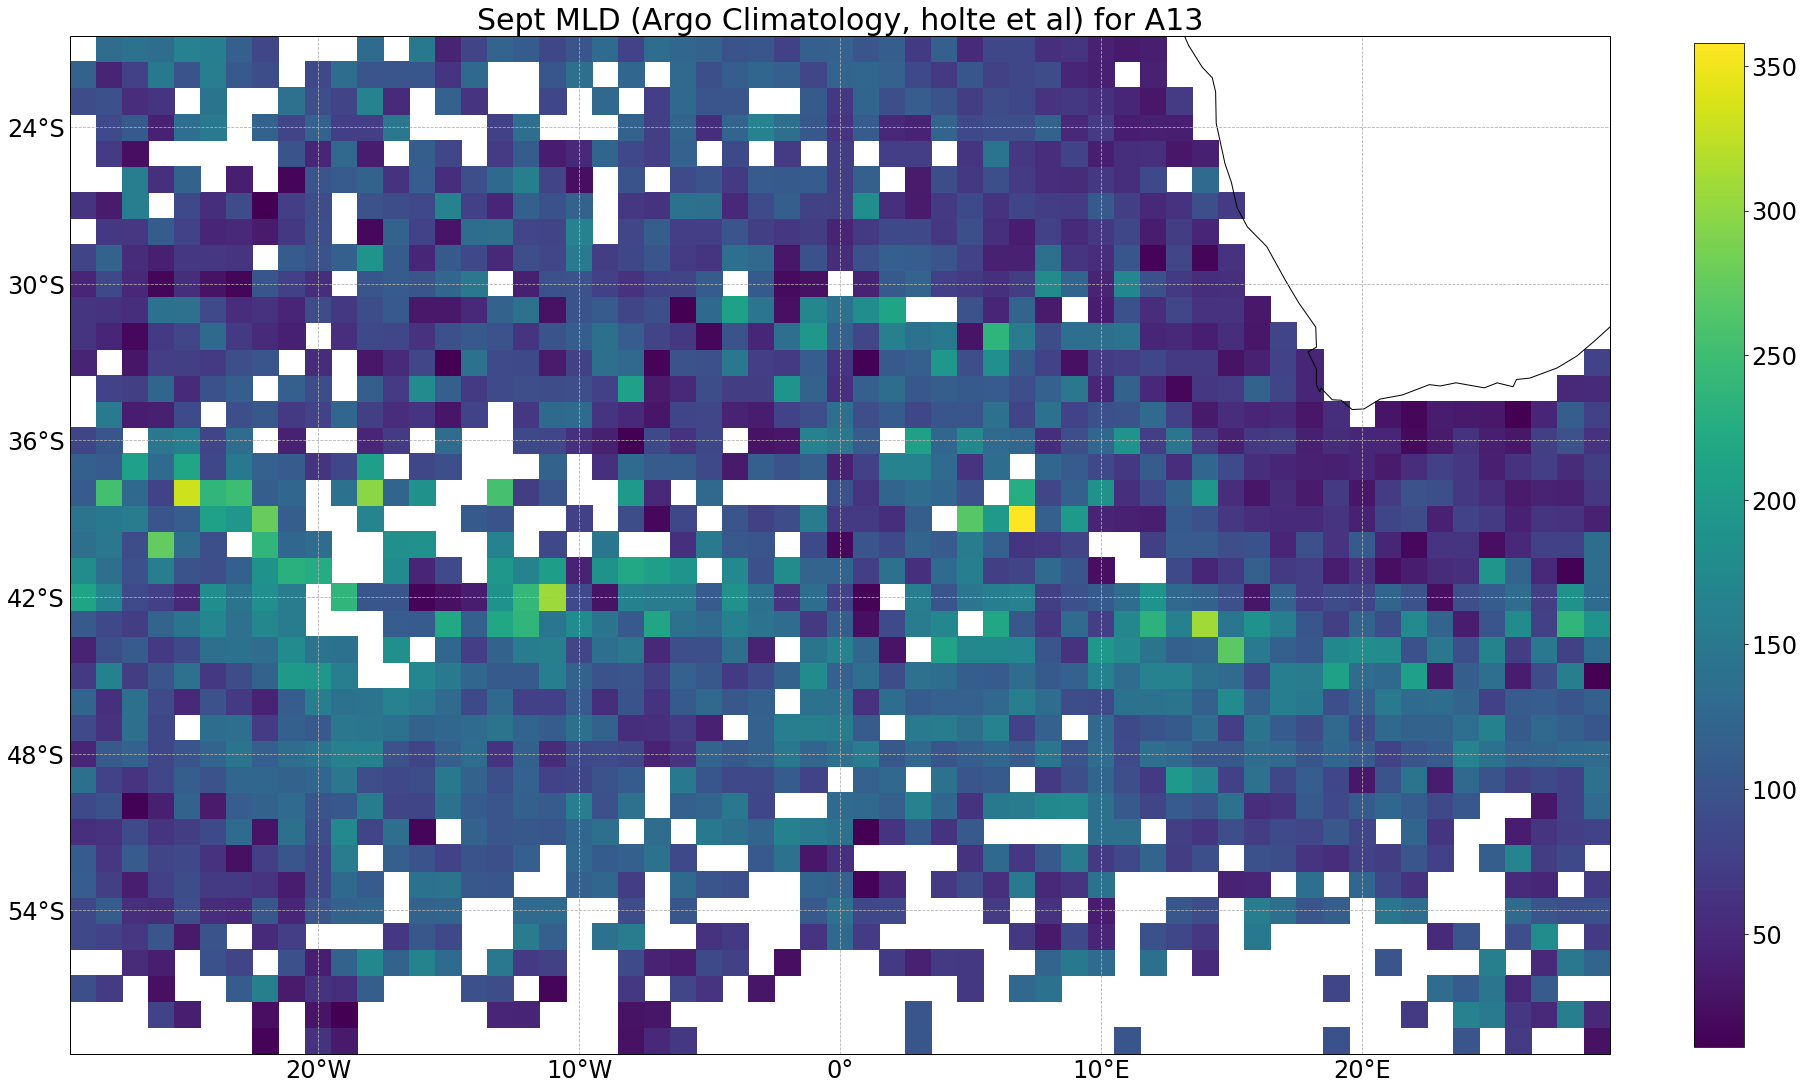

In [7]:
    
    f = xr.open_mfdataset('Argo_mixedlayers_monthlyclim_12112019.nc')
    
    lat = f['lat'].values
    lon = f['lon'].values
    mld = f['mld_da_mean'][:,:,8].values
    
    [xx,yy]=np.meshgrid(lon,lat)

    #So this is where the boundaries that you set up above come into play. You want to zoom into the area the cruise
    # is taking place but you don't want to just set the boundaries of the plot because it will still be processing 
    # the entire dataset. So instead, you'll limit the dataset itself to the area you want

    MLD = mld[(xx>=LonMin)&(xx<=LonMax)&(yy>=LatMin)&(yy<=LatMax)]
    Lon = lon[(lon>=LonMin)&(lon<=LonMax)]
    Lat = lat[(lat>=LatMin)&(lat<=LatMax)]
    
    MLD1 = MLD.reshape(len(Lat),len(Lon))
    
    plt.figure(1,(30,20))
    ax = plt.axes(projection=ccrs.PlateCarree())
    im = ax.pcolor(Lon,Lat,MLD1)
    
    ax.coastlines()

    g = ax.gridlines(draw_labels=True,linestyle='--') #add gridlines to the map
    
    cbar = plt.colorbar(im,fraction=0.03)
    cbar.ax.tick_params(labelsize=24) 

    g.ylabels_right = False
    g.xlabels_top = False
    from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
    g.xformatter = LONGITUDE_FORMATTER
    g.yformatter = LATITUDE_FORMATTER
    g.xlabel_style = {'size': 24}
    g.ylabel_style = {'size': 24}
    
    plt.title('Sept MLD (Argo Climatology, holte et al) for '+csig,fontsize=30)
    plt.savefig(csig+'/'+csig+'_MLD.png')
    #Image.open(csig+'/'+csig+'_MLD.png').save(csig+'/'+csig+'_MLD.jpg','JPEG');